In [9]:
from whisper.normalizers import EnglishTextNormalizer
normalize = EnglishTextNormalizer()
from jiwer import process_words
import pandas as pd
import os

def load_file(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        file_string = file.read()
    return file_string

def compare(reference_path, hypothesis_path):
    #normalize all text before comparison
    reference = normalize(load_file(reference_path))
    hypothesis = normalize(load_file(hypothesis_path))
    
    output = process_words(reference, hypothesis)
    return output.wer

In [63]:
results = []

for file in os.listdir("verbit"):
    if not file.startswith('.'):
        lecture_name = file.split('.')[0] + " "
        
        reference_path = os.path.join("reference", [l for l in os.listdir("reference") if l.startswith(lecture_name)][0])
        whisper_small_path = os.path.join("whisper/small.en", [l for l in os.listdir("whisper/small.en") if l.startswith(lecture_name)][0])
        whisper_base_path = os.path.join("whisper/base.en", [l for l in os.listdir("whisper/base.en") if l.startswith(lecture_name)][0])
        whisper_medium_path = os.path.join("whisper/medium.en", [l for l in os.listdir("whisper/medium.en") if l.startswith(lecture_name)][0])
        verbit_path = os.path.join("verbit", file)
        
        
        verbit_wer = compare(reference_path, verbit_path)
        results.append({"model":"verbit", "lecture":lecture_name[:-1], "wer": verbit_wer})
        
        whisper_small_wer = compare(reference_path, whisper_small_path)
        results.append({"model":"whisper small.en", "lecture":lecture_name[:-1], "wer": whisper_small_wer})
        
        whisper_base_wer = compare(reference_path, whisper_base_path)
        results.append({"model":"whisper base.en", "lecture":lecture_name[:-1], "wer": whisper_base_wer})
        
        whisper_medium_wer = compare(reference_path, whisper_medium_path)
        results.append({"model":"whisper medium.en", "lecture":lecture_name[:-1], "wer": whisper_medium_wer})

df = pd.DataFrame(results)
df

,model,lecture,wer
0,verbit,Lecture 17,0.072832
1,whisper small.en,Lecture 17,0.040087
2,whisper base.en,Lecture 17,0.042270
3,whisper medium.en,Lecture 17,0.033340
4,verbit,Lecture 19,0.069288
...,...,...,...
63,whisper medium.en,Lecture 14,0.042746
64,verbit,Lecture 13,0.078566
65,whisper small.en,Lecture 13,0.056488
66,whisper base.en,Lecture 13,0.062085


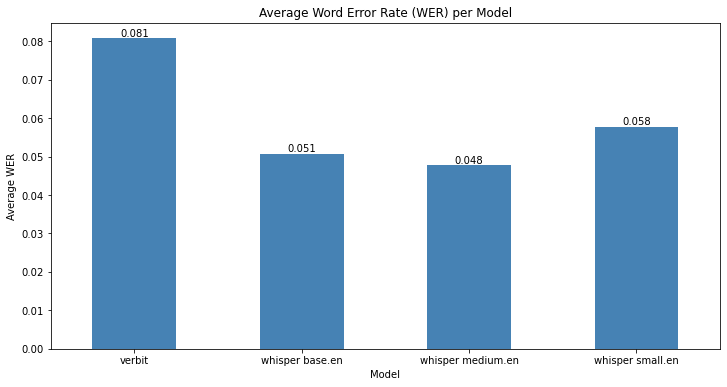

In [58]:
import matplotlib.pyplot as plt

average_wer = df.groupby('model')['wer'].mean()
plt.figure(figsize=(12, 6))
average_wer.plot(kind='bar', color='steelblue')

plt.title('Average Word Error Rate (WER) per Model')
plt.xlabel('Model')
plt.ylabel('Average WER')

for i, v in enumerate(average_wer):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', color='black')


plt.xticks(rotation=0)
plt.savefig('avg.png')
plt.show()

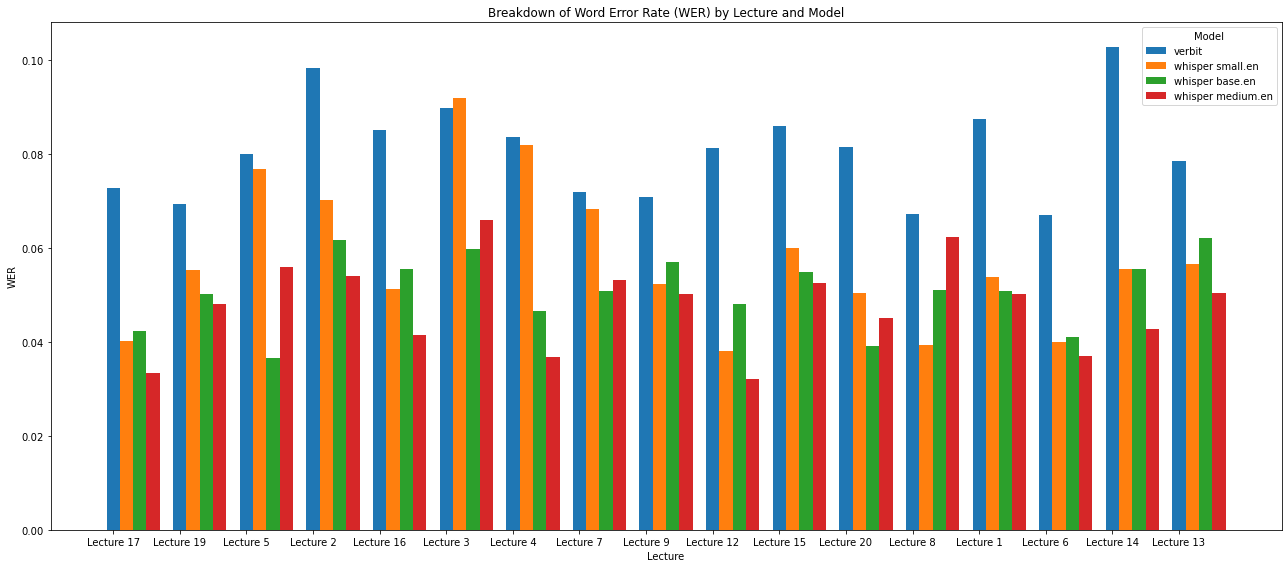

In [59]:
import numpy as np

models = df['model'].unique()
lectures = df['lecture'].unique()

# Set the width of each bar
bar_width = 0.2

# Set the offset for each bar group
offset = np.arange(len(lectures))

plt.figure(figsize=(18, 8))

# Plot the bars for each model and lecture combination
for i, model in enumerate(models):
    model_data = df[df['model'] == model]
    plt.bar(offset + (i * bar_width), model_data['wer'], width=bar_width, label=model)

plt.title('Breakdown of Word Error Rate (WER) by Lecture and Model')
plt.xlabel('Lecture')
plt.ylabel('WER')
plt.xticks(offset, lectures, rotation=0)

plt.legend(title='Model')

plt.tight_layout()
plt.savefig('detailed.png')
plt.show()